In [12]:
import numpy as np

def psd(A, b, P=None, max_iter=1000, tol=1e-10):
    """
    Preconditioned steepest descent method for solving linear system Ax = b
    with preconditioner P. Assumes A is symmetric positive definite.
    
    Parameters:
    A (np.ndarray): coefficient matrix
    b (np.ndarray): right-hand side vector
    P (np.ndarray): preconditioner matrix, default None (identity matrix)
    max_iter (int): maximum number of iterations, default 1000
    tol (float): tolerance for relative residual, default 1e-10
    
    Returns:
    x (np.ndarray): solution vector
    res (list): relative residual at each iteration
    """
    
    n = A.shape[0]
    x = np.zeros(n)
    r = b - A @ x
    if P is None:
        P = np.eye(n)
    z = np.linalg.solve(P, r)
    res = [np.linalg.norm(r) / np.linalg.norm(b)]
    
    for k in range(max_iter):
        alpha = (z @ r) / (z @ A @ z)
        x = x + alpha * z
        r = r - alpha * A @ z
        z = np.linalg.solve(P, r)
        res.append(np.linalg.norm(r) / np.linalg.norm(b))
        if res[-1] < tol:
            break
    
    return x, res


In [13]:

import numpy as np

A = np.loadtxt('B.dat', delimiter=',')
print(A.shape)


# Generate right-hand side vector b
xr = np.ones((2500, 1))
b = A @ xr


(2500, 2500)


In [14]:
# Without preconditioner
x, res = psd(A, b.flatten())
with open('psd_noprecon.txt', 'w') as f:
    for k, r in enumerate(res):
        f.write(f'{k}\t{r}\n')

# With preconditioner
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
P = (D + L) @ np.linalg.inv(D) @ (D + U)
x, res = psd(A, b.flatten(), P=P)
with open('psd_precon.txt', 'w') as f:
    for k, r in enumerate(res):
        f.write(f'{k}\t{r}\n')


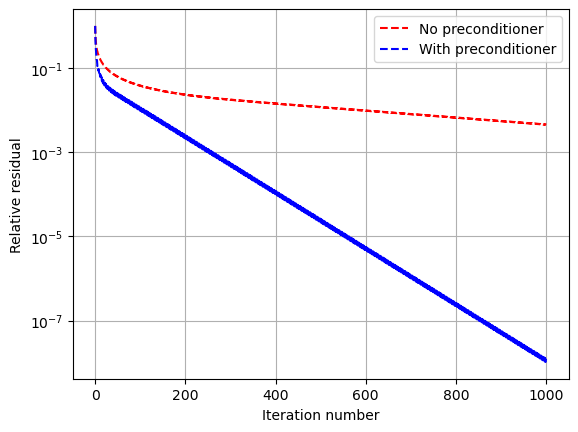

In [22]:
import matplotlib.pyplot as plt

# Load data from files
k_noprecon, res_noprecon = np.loadtxt('psd_noprecon.txt', unpack=True)
k_precon, res_precon = np.loadtxt('psd_precon.txt', unpack=True)

# Plot results
fig, ax = plt.subplots()
ax.semilogy(k_noprecon, res_noprecon, color='red', linestyle='--', label='No preconditioner')
ax.semilogy(k_precon, res_precon, color='blue', linestyle='--', label='With preconditioner')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Relative residual')
ax.grid(True)
ax.legend()
plt.show()


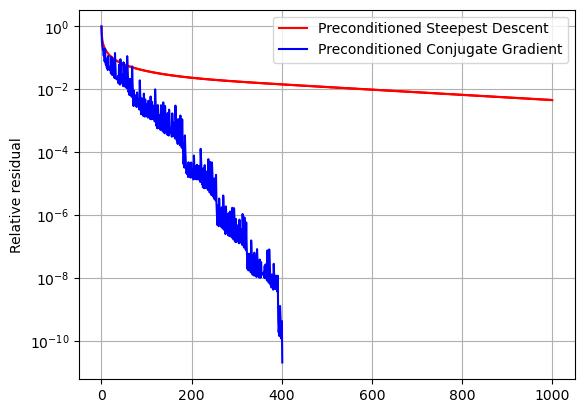

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def pcg(A, b, P=None, max_iter=1000, tol=1e-10):
    """
    Preconditioned conjugate gradient method for solving linear system Ax = b
    with preconditioner P. Assumes A is symmetric positive definite.
    
    Parameters:
    A (np.ndarray): coefficient matrix
    b (np.ndarray): right-hand side vector
    P (np.ndarray): preconditioner matrix, default None (identity matrix)
    max_iter (int): maximum number of iterations, default 1000
    tol (float): tolerance for relative residual, default 1e-10
    
    Returns:
    x (np.ndarray): solution vector
    res (list): relative residual at each iteration
    """
    n = A.shape[0]
    x = np.zeros(n)
    r = b - A @ x
    if P is None:
        P = np.eye(n)
    z = np.linalg.solve(P, r)
    p = z.copy()
    res = [np.linalg.norm(r) / np.linalg.norm(b)]
    for k in range(max_iter):
        Ap = A @ p
        alpha = (p @ r) / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        z = np.linalg.solve(P, r)
        beta = (p @ A @ z) / (p @ Ap)
        p = z + beta * p
        res.append(np.linalg.norm(r) / np.linalg.norm(b))
        if res[-1] < tol:
            break
    return x, res

# Read in matrix A from file
A = np.loadtxt('B.dat', delimiter=',')
A = A.reshape((2500, 2500))

# Generate right-hand side vector b
xr = np.ones((2500, 1))
b = A @ xr

# Without preconditioner
x, res_psd = psd(A, b.flatten())

# With preconditioner
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
P = (D + L) @ np.linalg.inv(D) @ (D + U)
x, res_pcg = pcg(A, b.flatten(), P=P)

# Plot results
fig, ax = plt.subplots()
ax.semilogy(res_psd, color='red', label='Preconditioned Steepest Descent')
ax.semilogy(res_pcg, color='blue', label='Preconditioned Conjugate Gradient')
ax.set_ylabel('Relative residual')
ax.grid(True)
ax.legend()
plt.show()
